In [2]:
# Essential libraries for data analysis and classification
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

# Aesthetics
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


In [3]:
# Load the dataset
df = pd.read_csv("../data/bank.csv")

# Quick check
print(f"✅ Dataset Shape: {df.shape}")
df.head()


✅ Dataset Shape: (11162, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
# Check missing values
print("\n✅ Missing Values:\n", df.isnull().sum())

# Check data types
print("\n✅ Data Types:\n", df.dtypes)



✅ Missing Values:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

✅ Data Types:
 age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object


In [6]:
print(df.columns.tolist())


['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'deposit']



 Target Class Distribution:
 deposit
no     5873
yes    5289
Name: count, dtype: int64


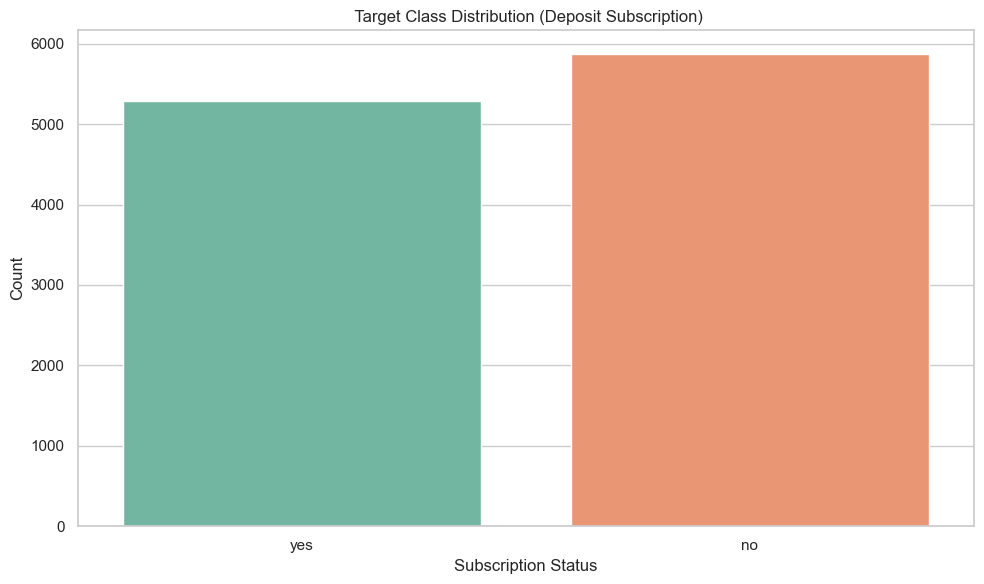

 Positive Class Ratio (Subscribed): 47.38%


In [22]:
# Check target class distribution
target_col = 'deposit'

print("\n Target Class Distribution:\n", df[target_col].value_counts())

# Visualize class balance
sns.countplot(data=df, x=target_col, hue=target_col, palette='Set2', legend=False)
plt.title(' Target Class Distribution (Deposit Subscription)')
plt.xlabel('Subscription Status')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('../visuals/target_class_distribution.png')
plt.show()

# Calculate class ratio
positive_class_ratio = df[target_col].value_counts(normalize=True).get('yes', 0) * 100
print(f" Positive Class Ratio (Subscribed): {positive_class_ratio:.2f}%")


In [8]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Make a copy for encoding
df_encoded = df.copy()

# Identify categorical columns (excluding target)
categorical_cols = df_encoded.select_dtypes(include='object').columns.drop(target_col)

# Apply Label Encoding to categorical features
le = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Encode target variable (yes → 1, no → 0)
df_encoded[target_col] = df_encoded[target_col].map({'yes': 1, 'no': 0})

# Features and Target
X = df_encoded.drop(target_col, axis=1)
y = df_encoded[target_col]

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"✅ Encoding & Scaling Done. Feature Shape: {X_scaled.shape}")


✅ Encoding & Scaling Done. Feature Shape: (11162, 16)


In [9]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"✅ Train Shape: {X_train.shape}, Test Shape: {X_test.shape}")


✅ Train Shape: (8929, 16), Test Shape: (2233, 16)


In [10]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

print("✅ Logistic Regression Model Trained Successfully.")


✅ Logistic Regression Model Trained Successfully.


In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Predict on test data
y_pred = model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"✅ Accuracy: {accuracy:.4f}")
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Recall: {recall:.4f}")
print(f"✅ F1 Score: {f1:.4f}")

# Full classification report
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 0.7976
✅ Precision: 0.7959
✅ Recall: 0.7703
✅ F1 Score: 0.7829

✅ Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.82      0.81      1175
           1       0.80      0.77      0.78      1058

    accuracy                           0.80      2233
   macro avg       0.80      0.80      0.80      2233
weighted avg       0.80      0.80      0.80      2233



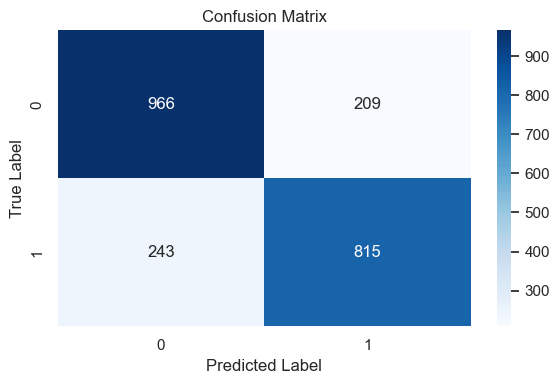

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.savefig("../visuals/confusion_matrix.png")
plt.show()


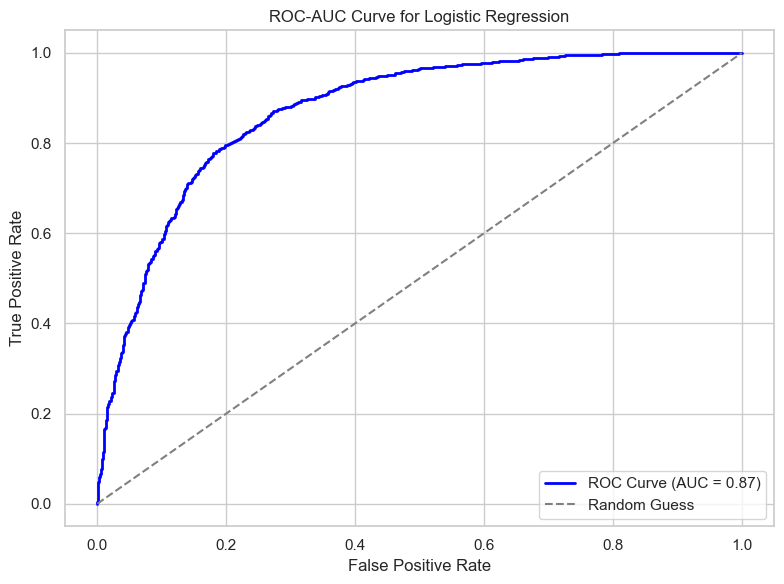

In [18]:
from sklearn.metrics import roc_auc_score, roc_curve

# Calculate predicted probabilities for the positive class
y_prob = model.predict_proba(X_test)[:, 1]

# Get False Positive Rate, True Positive Rate, Thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')

# Plot Settings
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig("../visuals/roc_auc_curve.png")
plt.show()
